In [1]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

sys.path.append("../sta831-sp23/")
from utility.ar import AR

In [2]:
pleth = pd.read_csv("data/Pleth.csv", header=None, names=['time', 'pleth']).set_index('time')['pleth']
ecg1 = pd.read_csv("data/ECG1.csv", header=None, names=['time', 'ecg1']).set_index('time')['ecg1']

In [3]:
n = pleth.shape[0]
start = np.random.randint(0, n)
end = np.min([n, start+5000])

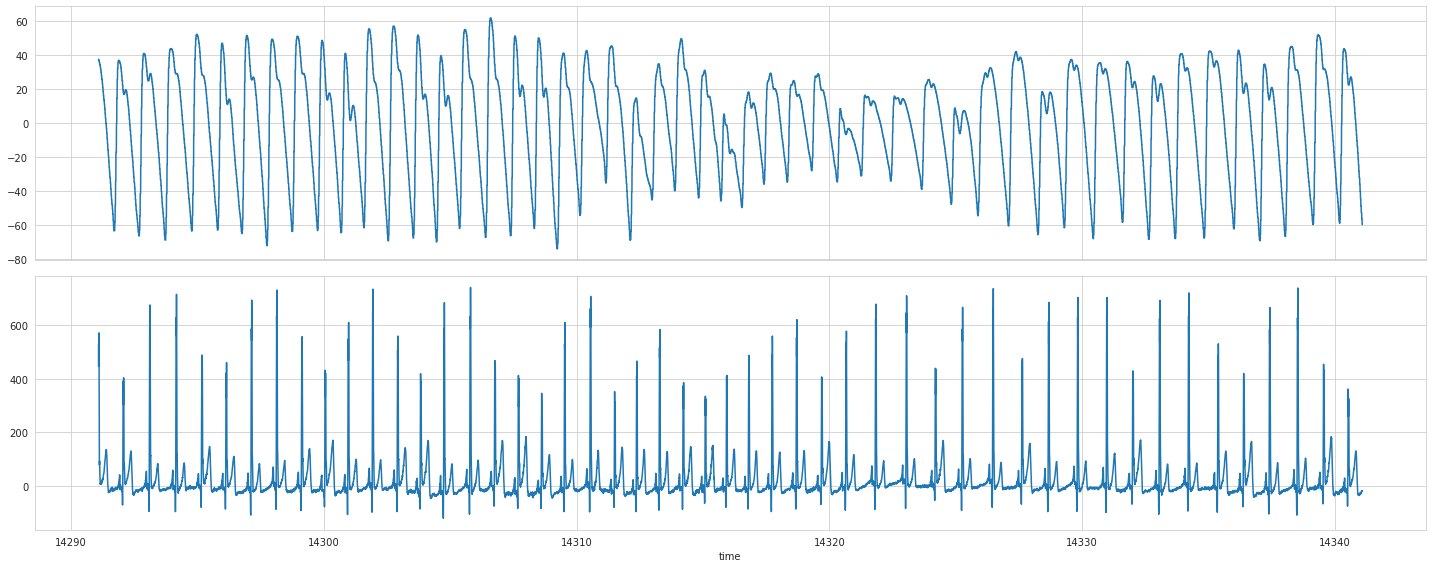

In [4]:
fig, ax = plt.subplots(nrows=2, figsize=(20, 8), sharex=True)

pleth.iloc[start:end+5000].plot(ax=ax[0])
ecg1.iloc[start:end+5000].plot(ax=ax[1])

fig.tight_layout()
fig.show()

In [34]:
sns.set_style('white')

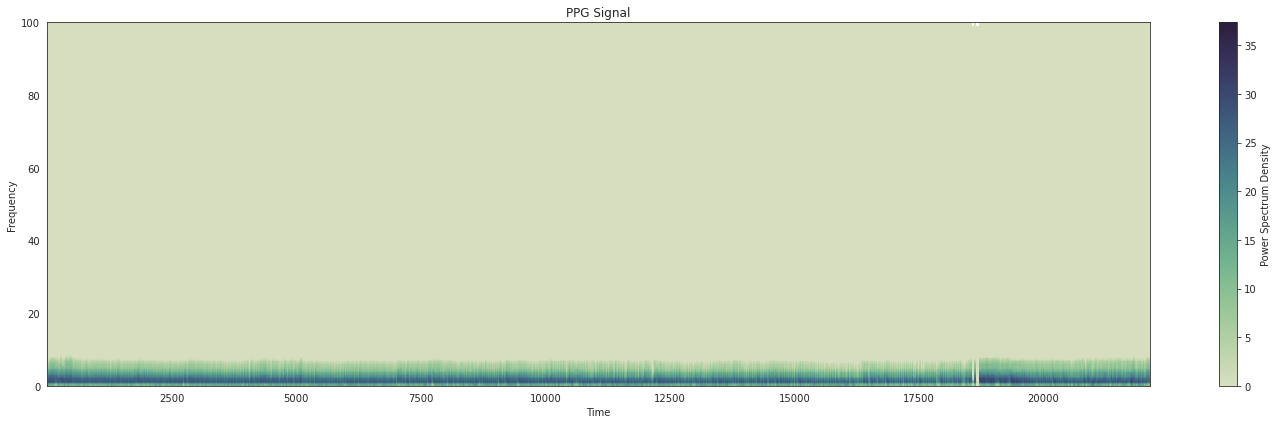

In [95]:
fig, ax = plt.subplots(figsize=(20, 6))

spectrum, freqs, t, im = ax.specgram(pleth, Fs=200, cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), vmin=0)

ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_title('PPG Signal')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power Spectrum Density')
fig.tight_layout()
fig.show()

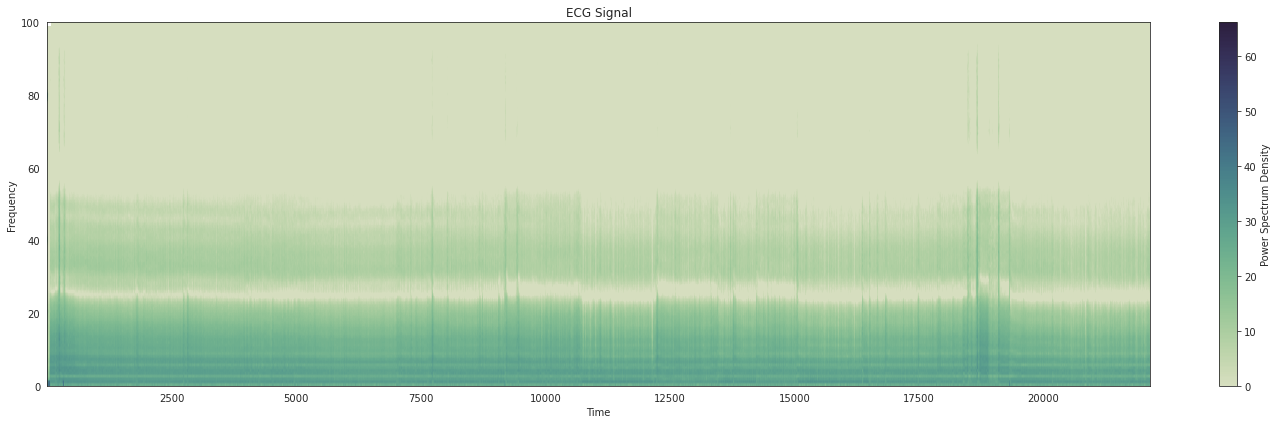

In [94]:
fig, ax = plt.subplots(figsize=(20, 6))

spectrum, freqs, t, im = ax.specgram(ecg1, Fs=200, cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), vmin=0)

ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_title('ECG Signal')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power Spectrum Density')
fig.tight_layout()
fig.show()

<AxesSubplot: xlabel='time'>

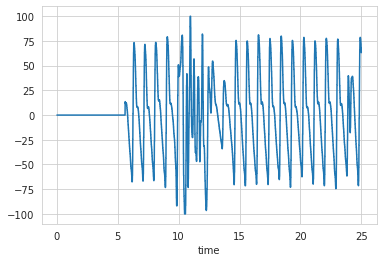

In [372]:
pleth.iloc[:5000].plot()

In [346]:
ar = AR(lags=500)
ar.fit(pleth.iloc[start:end+5000].values)

In [348]:
vs = ar.sample_innovation_var(10000)

In [349]:
bs = ar.sample_coeff(vs)

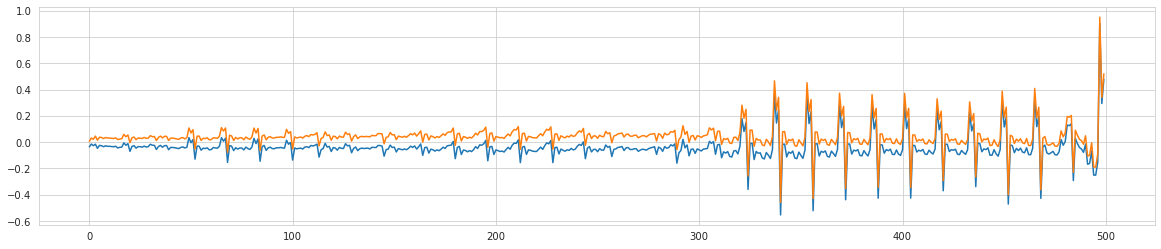

In [384]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(np.quantile(bs, [0.025, 0.975], axis=0).T)

<AxesSubplot: ylabel='Count'>

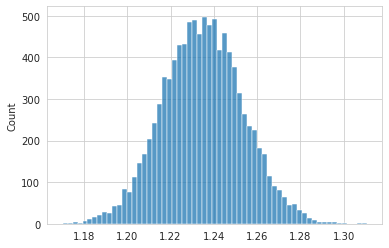

In [357]:
sns.histplot(vs)

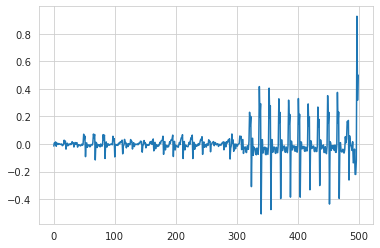

In [356]:
plt.plot(ar.coeff_)

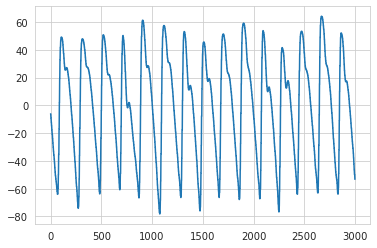

In [1030]:
plt.plot(pleth.iloc[start:start+3000].values)

In [1034]:
sr = pleth.iloc[start:start+2000].values

period = 10
dt = 0.005
L = 2000
ts = np.linspace(0, L-1, int(period/dt))
N = 50
A = np.zeros(2*N, dtype=np.complex128)
y_hat = np.zeros(int(period/dt), dtype=np.complex128)
for i, k in enumerate(range(-N, N)):
    phi_basis = np.exp(-2j*np.pi/(L-1)*k*ts)
    A[i] = sr @ phi_basis * dt/period

    phi_basis = np.exp(2j*np.pi/(L-1)*k*ts)
    y_hat += A[i] * phi_basis

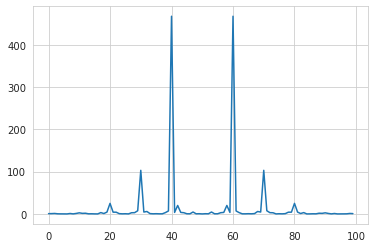

In [1035]:
plt.plot(np.abs(A)**2)

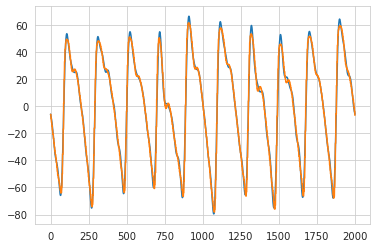

In [1036]:
plt.plot(np.array(y_hat).real)
plt.plot(sr)

/home/ztang484/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


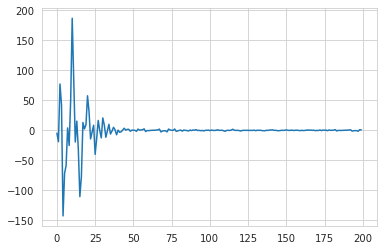

In [933]:
plt.plot(dws)

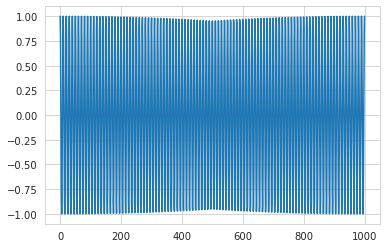

In [918]:
plt.plot(np.linspace(0,1000,1000), np.exp(2j*np.pi*100*np.linspace(0,1000,1000)))

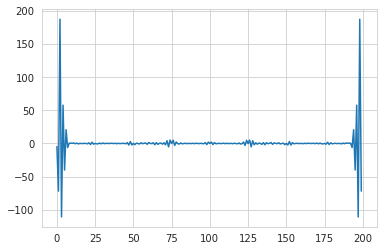

In [899]:
plt.plot(np.array(dws).real)

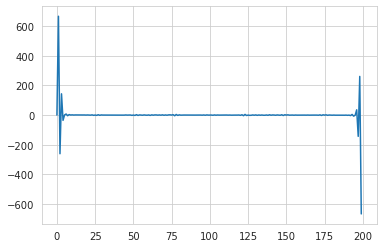

In [900]:
plt.plot(np.array(dws).imag)

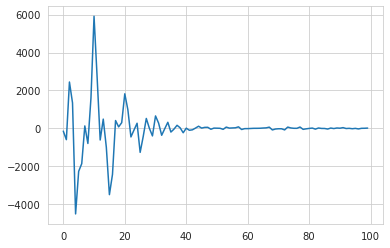

In [887]:
plt.plot(np.fft.fft(sr)[:100].real)

/home/ztang484/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


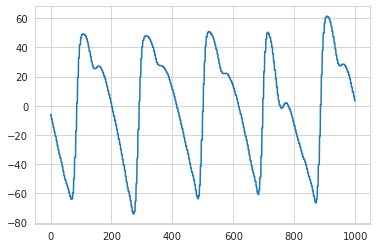

In [889]:
plt.plot(np.fft.ifft(np.fft.fft(sr)))

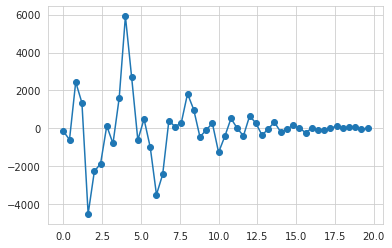

In [778]:
plt.plot(np.fft.fftfreq(500, 1/200)[:50], np.fft.fft(pleth.iloc[start:start+1000].values)[:50].real, marker='o')

In [742]:
freqs = np.fft.fftfreq(500, 1/200)[:25]
As = np.fft.fft(pleth.iloc[start:start+1000].values)[:25]

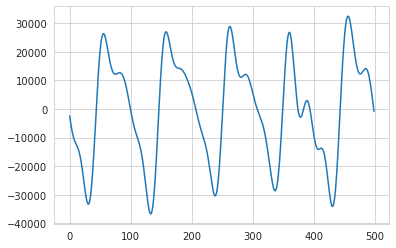

In [743]:
ts = np.linspace(0, 500-1, 500)
xs = np.zeros(500, dtype=np.complex128)

for i in range(20):
    xs += As[i] * np.exp(2j*np.pi*freqs[i]/200*ts)

plt.plot(ts, xs.real)

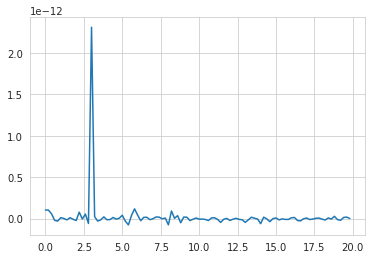

In [679]:
plt.plot(np.fft.fftfreq(5*freq, 1/freq)[:100], np.fft.fft(c1)[:100].real)

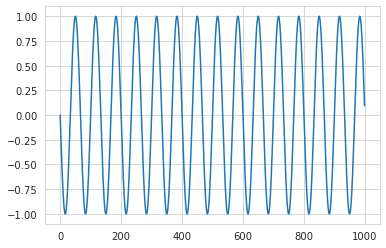

In [677]:
freq = 200  # sampling frequency
w = 3/freq  # 0.025 cycles / time unit, 40 points / cycle
ts = np.linspace(0, 5*freq-1, 5*freq)
c1 = np.cos(np.pi/2)*np.cos(2*np.pi*w*ts) - np.sin(np.pi/2)*np.sin(2*np.pi*w*ts)

plt.plot(ts, c1)

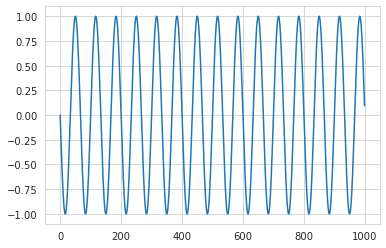

In [689]:
plt.plot(((np.cos(np.pi/2)+np.sin(np.pi/2)*1j) * np.exp(1j*2*np.pi*w*ts)).real)

## ECG Investigate

<AxesSubplot: xlabel='time'>

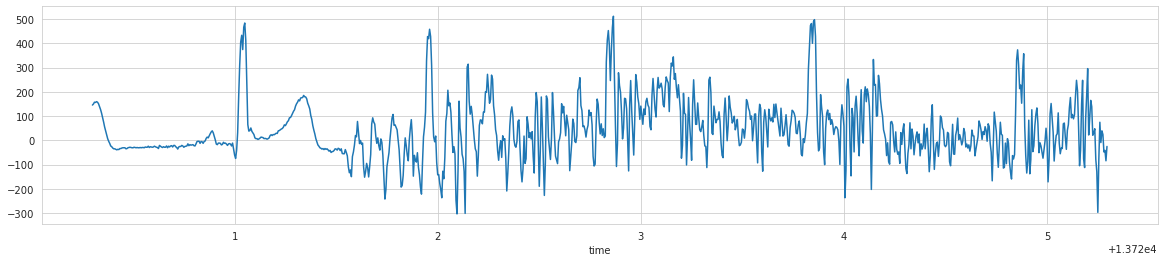

In [71]:
n = ecg1.shape[0]
start = np.random.randint(0, n)
end = np.min([n, start+1000])

ecg1.iloc[start:end].set_index('time')['ecg1'].plot(figsize=(20, 4))

<AxesSubplot: xlabel='time'>

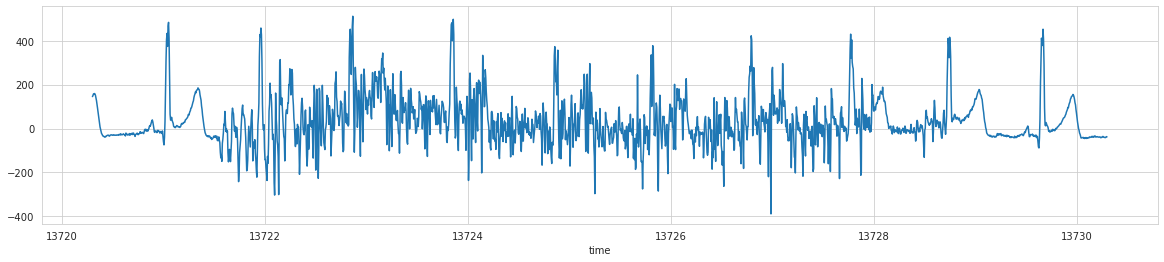

In [76]:
ecg1.iloc[start:end+1000].set_index('time')['ecg1'].plot(figsize=(20, 4))

<AxesSubplot: xlabel='time'>

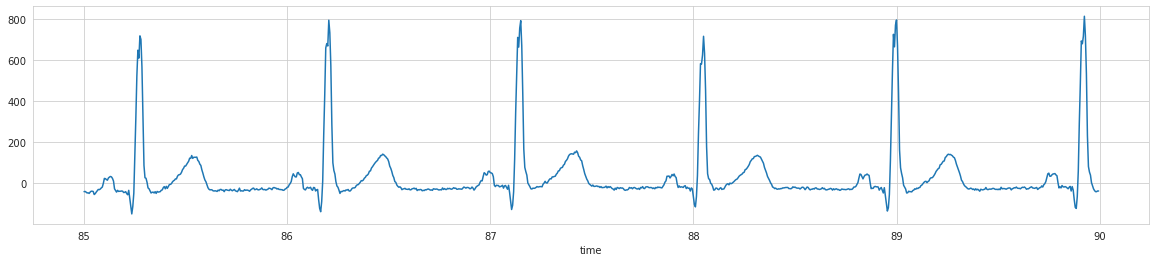

In [105]:
ecg1.iloc[17000:18000].plot(figsize=(20, 4))

In [210]:
sr = ecg1.iloc[16960:17560]
# sr -= sr.mean()
# sr /= sr.sum()

In [87]:
start, end

(2744060, 2745060)

<AxesSubplot: xlabel='time'>

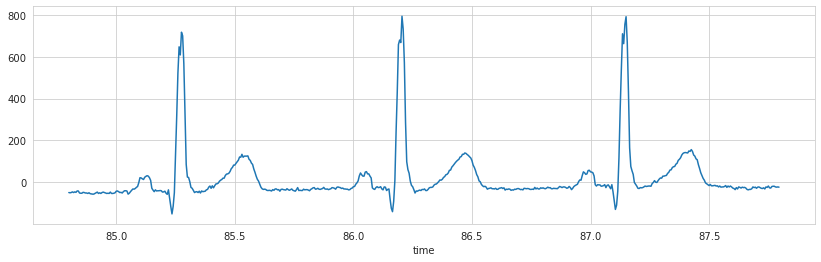

In [214]:
sr.plot(figsize=(14,4))